In [1]:
import numpy as np
import h5py
import cv2
import os, sys
import argparse
from core.get_args import get_args
from core.produce_denoised_img import produce_denoised_img_no_crop
from core.utils import TedataLoader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from core.watershed import segmentation_with_masking
from core.median_filter import apply_median_filter_cpu, apply_median_filter_gpu, apply_median_filter_gpu_simple
%load_ext autoreload
%autoreload 2

In [2]:
!ls -al ./intermediate_result/segmentation_img_*.npy

-rw-rw-r-- 1 hyunwoong hyunwoong 6003976614 Feb 21 09:30 ./intermediate_result/segmentation_img_F02_v2.npy
-rw-rw-r-- 1 hyunwoong hyunwoong 6003976614 Feb 21 09:44 ./intermediate_result/segmentation_img_F04_v2.npy
-rw-rw-r-- 1 hyunwoong hyunwoong 6003976614 Feb 21 09:59 ./intermediate_result/segmentation_img_F08_v2.npy
-rw-rw-r-- 1 hyunwoong hyunwoong 6003976614 Feb 21 10:28 ./intermediate_result/segmentation_img_F16_v1.npy
-rw-rw-r-- 1 hyunwoong hyunwoong 6003976614 Feb 21 10:13 ./intermediate_result/segmentation_img_F16_v2.npy
-rw-rw-r-- 1 hyunwoong hyunwoong 6003976614 Feb 21 09:15 ./intermediate_result/segmentation_img_median_filter.npy


In [3]:
target='F16_v1'
a = np.load(f"./intermediate_result/segmentation_img_{target}.npy",allow_pickle=True).item()
a.keys()

dict_keys(['SET01', 'SET02', 'SET03', 'SET04', 'SET05', 'SET06', 'SET07', 'SET08', 'SET09', 'SET10'])

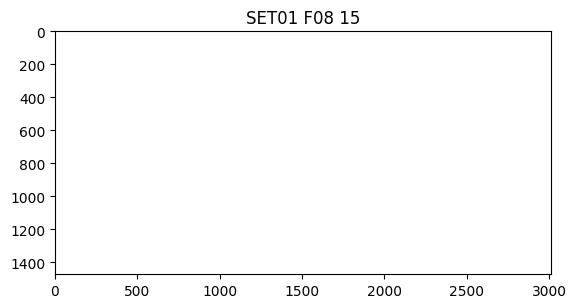

In [8]:
from matplotlib import animation
from matplotlib.patches import Rectangle

from celluloid import Camera # getting the camera
from IPython.display import HTML

fig, ax = plt.subplots()
camera = Camera(fig)
for i in range(len(a['SET01']['F08'])):
    img = a['SET01']['F08'][i]
    ax.set_title(f"SET01 F08 {i}")
    ax.imshow(img)
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())

    # plt.pause(0.01)

In [9]:
a = [1,2,3,None]
min(a),max(a)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [10]:
if None in a :
    print("yes")

yes
